# Operatrion

In [43]:
class Operation():
    
    def __init__(self,input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self): 
        pass

In [44]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.input = [x_var,y_var]
        return x_var + y_var
        

In [45]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.input = [x_var,y_var]
        return x_var * y_var

In [47]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.input = [x_var,y_var]
        return x_var.dot(y_var)

In [48]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes=[]
        
        _default_graph.placeholders.append(self)

In [49]:
class Variable():
    
    def __init__(self,initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.varialbes.append(self)

In [50]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.varialbes = [] 
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

z = Ax+b

A = 10
b = 1

x is a placeholder here
z = 10x + 1

In [51]:
g = Graph()
g.set_as_default()

In [52]:
A = Variable(10)
b = Variable(1)

In [53]:
x = Placeholder()
x.output_nodes


[]

In [54]:
y = multiply(A,x)
y.input_nodes

In [55]:
z = add(y,b)

In [56]:
def traverse_postorder(operation):
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node,Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
                
        nodes_postorder.append(node)
        
        
    recurse(operation)
    return nodes_postorder

In [57]:
class Session():
    
    def run(self,operation,feed_dict={}):
        
        import numpy as np
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                node.inputs= [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output)  == list:
                node.output = np.array(node.output)
            
        return operation.output

In [58]:
sess = Session()


In [59]:
result = sess.run(operation=z,feed_dict={x:10})

In [60]:
result

101

In [61]:
g = Graph()
g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2])

x = Placeholder()
y = matmul(A,x)
z= add(y,b)

In [62]:
sess = Session()
sess.run(operation=z,feed_dict={x:10})

array([[101, 202],
       [301, 402]])

# Classification 
# Activation Function

In [63]:
import matplotlib.pyplot as plt

In [64]:
%matplotlib inline

In [65]:
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [66]:
simple_z = np.linspace(-10,10,100)
#return 100 numbers that are evenly spaced from -10 to 10

In [67]:
simple_z

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [68]:
sample_a=sigmoid(simple_z)

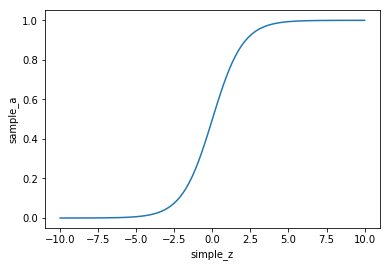

In [69]:
plt.xlabel("simple_z")
plt.ylabel("sample_a")
plt.plot(simple_z,sample_a)


In [105]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super().__init__([z])
        
    def compute(self,z_val):
        return 1/(1+np.exp(-z_val))

In [106]:
#to create dataset
from sklearn.datasets import make_blobs

In [107]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [108]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [109]:
type(data)

tuple

In [110]:
features = data[0]
labels = data[1]

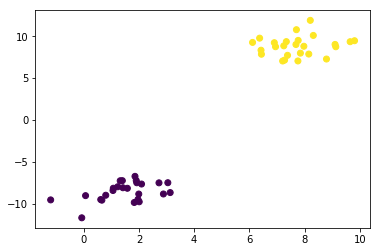

In [111]:
plt.scatter(features[:,0],features[:,1],c=labels)

Text(0,0.5,'feature 2')

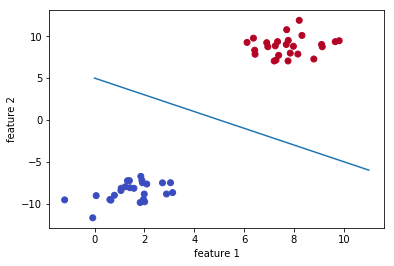

In [112]:
x = np.linspace(0,11,10)
y = -x+5
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [113]:
 # (1,1) * f -5 =0

In [114]:
a=np.array([1,1]).dot(np.array([[8],[10]]))-5

In [115]:
a

array([13])

In [116]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [117]:
g = Graph()

In [118]:
g.set_as_default()

In [119]:
x = Placeholder()

In [120]:
w = Variable([1,1])


In [121]:
b = Variable(-5)

In [122]:
z = add(matmul(w,x),b)

In [123]:
a= Sigmoid(z)

In [124]:
sess = Session()

In [125]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.999997739675702

In [127]:
sess.run(operation=a,feed_dict={x:[2,-10]})

2.2603242979035746e-06

NameError: name 'a' is not defined

NameError: name 'a' is not defined

In [ ]:
%